# 3.2 Computing and Visualizing the 2-D DFT in MATLAB

#### The DFT and its inverse are obtained in practice using a fast Fourier transform (FFT) algorithm. The FFT of an image array $f$ is obtained in MATLAB using function `fft2`, which has the syntax:

In [ ]:
F = fft2(f)

#### This function returns a Fourier transform that is also of size $M\times N$, with the origin of the data at the top left, and with four quarter periods meeting at the center of the frequency rectangle.

#### It is necessary to pad the input image with zeros when the Fourier transform is used for filtering. In this case, the syntax becomes

In [ ]:
F = fft2(f, P, Q)

#### With this syntax, `fft2` pads $f$ with the required number of zeros so that the resulting transform is of size $P\times Q$.

#### The Fourier spectrum is obtained by using function `abs`

In [ ]:
S = abs(F)

#### which computes the magnitude (square root of the sum of the squares of the real and imaginary parts) of each element of the array.

#### Visual analysis of the spectrum by displaying it as an image is an important aspect of working in the frequency domain. As an illustration, consider the image $f$, in Fig. 3.3(a). We compute its Fourier transform and display the spectrum using the following commands.

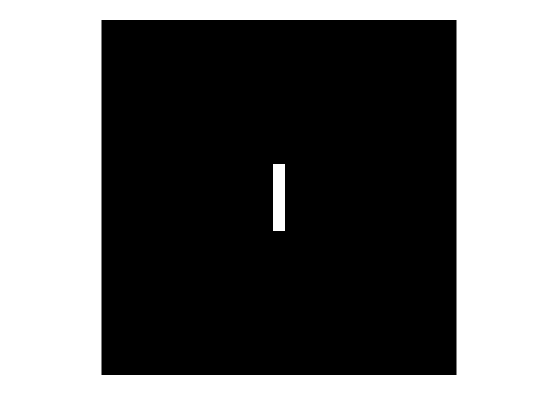

In [3]:
f = imread('Fig0303(a).tif');
imshow(f);

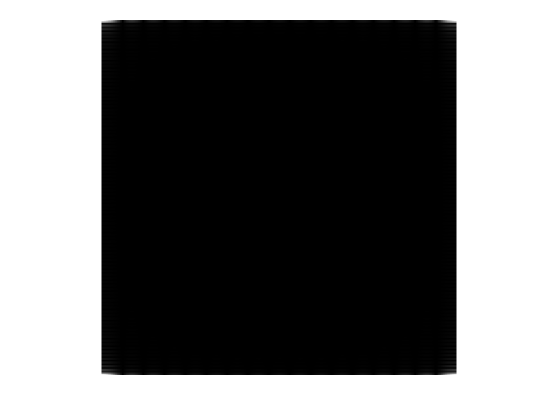

In [5]:
F = fft2(f);
S = abs(F);
imshow(S, []);

#### The result is shown in the right. The four bright spots in the corners of the image are a result of the periodicity property.

#### Function `fftshift` can be used to move the origin of the transform to the center of the frequency rectangle. The syntax is

In [ ]:
Fc = fftshift(F)

#### where $F$ is the transform computed using `fft2` and $Fc$ is the centered transform. Function `fftshift` operates by swapping the quadrants of $F$. For example, if `a = [1 2; 3 4]`, then `fftshift(a) = [4 3; 2 1]`.

#### When applied to a Fourier transform, the net result of using `fftshift` is the same as if the input image had been multiplied by $(-1)^{x+y}$ prior to computing the transform. Note, however, that the two processes are not interchangeable. That is, letting $\zeta[.]$ denote the Fourier transform of the argument, we have that $\zeta[(-1)^{x+y}f(x,y)]$ is equal to `fftshift(fft2(f))`, but this quantity is not equal to `fft2(fftshift(f))`.

#### In the present example, typing

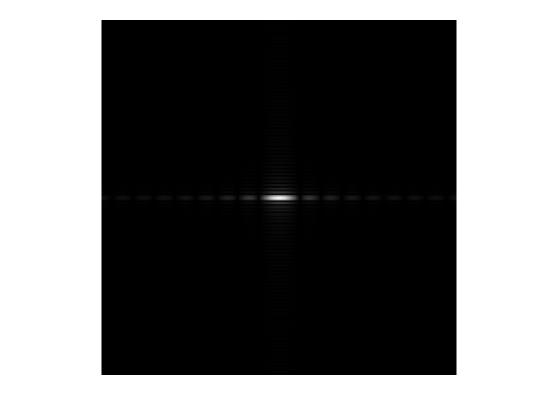

In [2]:
Fc = fftshift(F);
imshow(abs(Fc), []);

#### The range of values in this spectrum is so large (0 to 420,495) compared to the 8 bits of the display that the bright values in the center dominate the result. This difficulty is handled via a log transformation. Thus, the commands

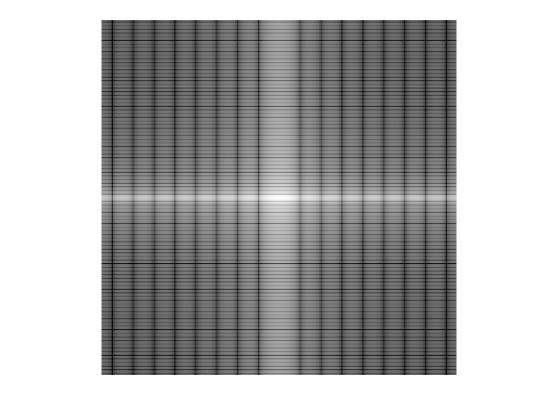

In [6]:
S2 = log(1 + abs(Fc));
imshow(S2, []);

#### The increase in visual detail is significant.

#### Function `ifftshift` reverses the centering. Its syntax is

In [ ]:
F = ifftshift(Fc)

#### This function can be used also to convert a function that is initially centered on a rectangle to a function whose center is at the top, left corner of the rectangle.

#### The real and imaginary components of the 2-D Fourier transform, $R(u,v)$ and $I(u,v)$, respectively, are arrays of the same size as $F(u,v)$. Because the elements of $R$ and $I$ can be positive and negative independently, we need to be able to compute the arctangent in the full $[-\pi,\pi]$ range. MATLAB's function `atan2` performs this computation. Its syntax is

In [ ]:
phi = atan2(I, R)

#### where $phi$ is an array of the same size as $I$ and $R$. The elements of `phi` are angles in radians in the range $[-\pi,\pi]$ measured with respect to the real axis.

#### In practice, we would write the preceding expression as

In [ ]:
phi = atan2(imag(F), real(F))

#### Instead of extracting the real and imaginary components of $F$, we can use function `angle` directly, the result is the same. Given the spectrum and its corresponding phase angle, we can obtain the DFT using the expression in the second line.

> In images.internal.imageDisplayValidateParams>validateCData (line 143)
  In images.internal.imageDisplayValidateParams (line 27)
  In images.internal.imageDisplayParseInputs (line 78)
  In imshow (line 245)



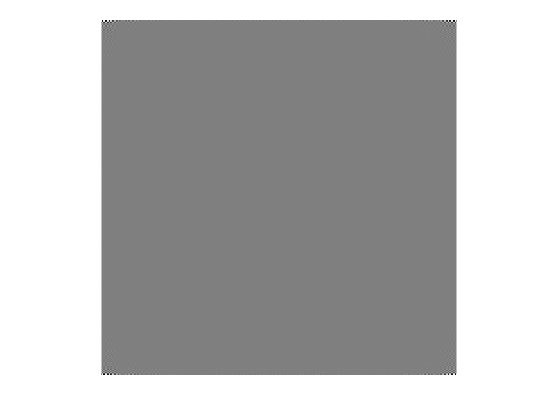

In [18]:
phi = angle(F);
FF = S .* exp(i * phi);
imshow(FF, []);